In [ ]:
#copied and pasted the first cell from the data_visualization notebook with all the import statements

#visualization tools
import matplotlib.pyplot as plt #matplotlib is a basic plotting library
import seaborn as sns; sns.set() #seaborn is a library that uses matplotlib to make styled plots
from scipy.stats import pearsonr
import plotly_express as px #plotly express is a library for drawing interactive figures
import hypertools as hyp #hypertools is a library for visualizing "high-dimensional" data

#data wrangling tools
import pandas as pd
import numpy as np; np.random.seed(0)

%matplotlib inline



In [ ]:
df = pd.read_csv('top2018.csv').fillna(0)
df.head()

#df = dataframe of top 2018 songs

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(18,12))
spotify_dataset['artists'].value_counts().plot.bar()

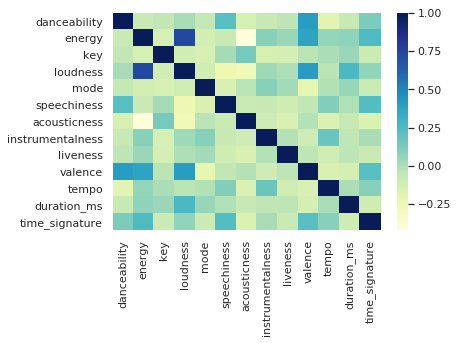

In [5]:
sns.heatmap(df.corr(),cmap="YlGnBu")

In [6]:
df['artists'].value_counts().head(20) #top 20 artists with the most hit songs in top 100

XXXTENTACION       6
Post Malone        6
Drake              4
Ed Sheeran         3
Marshmello         3
Imagine Dragons    2
Ozuna              2
Camila Cabello     2
Migos              2
Khalid             2
Maroon 5           2
Selena Gomez       2
The Weeknd         2
Calvin Harris      2
Clean Bandit       2
Ariana Grande      2
Dua Lipa           2
Kendrick Lamar     2
Zac Efron          1
Cardi B            1
Name: artists, dtype: int64

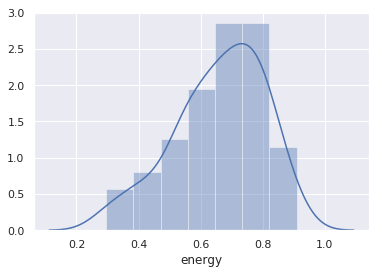

In [7]:
sns.distplot(df['energy'])

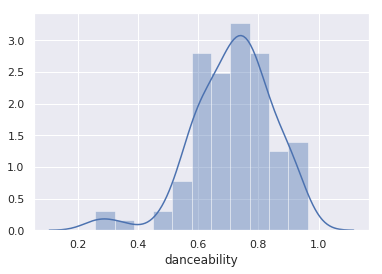

In [8]:
sns.distplot(df['danceability'],hist=True,kde=True)


In [9]:
Correlation=df[['danceability','energy','valence','loudness','tempo']]

In [10]:
# Set conditions
Vd=df['danceability']>=0.75
Ld=(df['danceability']>=0.5) & (df['danceability']<0.75)
Nd=df['danceability']<0.5

In [11]:
data=[Vd.sum(),Ld.sum(),Nd.sum()]
Danceability=pd.DataFrame(data,columns=['percent'],
                   index=['Very','Regular','Instrumental'])

In [12]:
Danceability.head()

,percent
Very,43
Regular,53
Instrumental,4


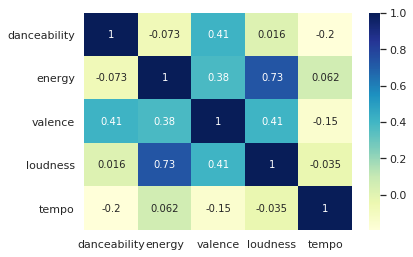

In [13]:
sns.heatmap(Correlation.corr(),annot=True,cmap="YlGnBu") #song variable correlation


/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



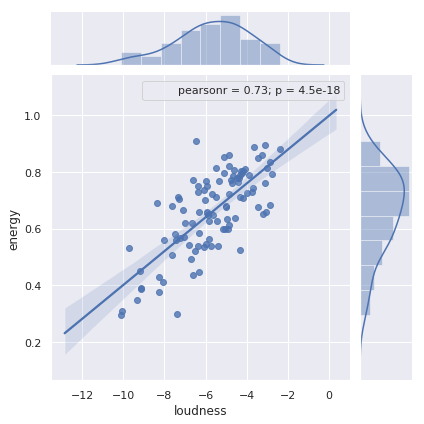

In [14]:
sns.jointplot(data=Correlation,y='energy',x='loudness',kind='reg',stat_func=pearsonr) 
# loudness values closer to zero tend to have high rhythm


KeyError: "None of [Index(['geek_rating'], dtype='object')] are in the [columns]"

In [ ]:
for i in range(99):
    if df['tempo'][i]>168:
        df['tempo'][i]='Presto'
    if (df['tempo'][i]>=110) & (df['tempo'][i]<=168):
        df['tempo'][i]='Allegro'
    elif (df['tempo'][i]>=76) & (df['tempo'][i]<=108):
        df['tempo'][i]='Andante'
    elif (df['tempo'][i]>=66) & (df['tempo'][i]<=76):
        df['tempo'][i]='Adagio'
    elif df['tempo'][i]<65:
        df['tempo'][i]='Length'
        
#Length: very slow (20 bpm)
#Adagio: slow and majestic (66 to 76 bpm)
#Andante: at the pace, quiet, a little vivacious (76 to 108 bpm)
#Allegro: animated and fast. (110 to 168 bpm).
#Presto: very fast (168 to 200 bpm).